# Fashion Products Classification

In this project, I will predict the type of fashion products by using Convolutional Neural Network architecture.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Labels:
<br>
0 T-shirt/top
<br>
1 Trouser
<br>
2 Pullover
<br>
3 Dress
<br>
4 Coat
<br>
5 Sandal
<br>
6 Shirt
<br>
7 Sneaker
<br>
8 Bag
<br>
9 Ankle boot



# Introduction

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Read the dataset
train_raw = pd.read_csv('fashion-mnist_train.csv')
test_raw = pd.read_csv('fashion-mnist_test.csv')

Using TensorFlow backend.


# Data Exploration

In [3]:
# Check if there is a null value
print('train set null values:')
print(train_raw.isnull().sum().sum())
print('test set null values:')
print(test_raw.isnull().sum().sum())

train set null values:
0
test set null values:
0


In [4]:
print('train set:')
train_raw.head()

train set:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print('test set:')
test_raw.head()

test set:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('train label distribution:')
train_raw['label'].value_counts()

train label distribution:


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

# Data Preparation

In [7]:
# To divide train set into train and validation set getting them shuffled
# Define x and y to be values in train set
x = train_raw.drop('label', axis=1).values
y = to_categorical(train_raw['label'].values)

# Divide train set into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

# Reshape data to fit model
x_train = x_train.reshape(-1,28,28,1)
x_val = x_val.reshape(-1,28,28,1)
x_test = test_raw.drop('label', axis=1).values.reshape(-1,28,28,1)

# Resize data
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# test labels for evaluation
y_test = test_raw['label'].values
y_test_onehot = to_categorical(y_test)

print('Train shape:', x_train.shape,
      '\n',
      'Validation shape:', x_val.shape,
      '\n',
      'Test shape:', x_test.shape)

Train shape: (48000, 28, 28, 1) 
 Validation shape: (12000, 28, 28, 1) 
 Test shape: (10000, 28, 28, 1)


Example images from train set:


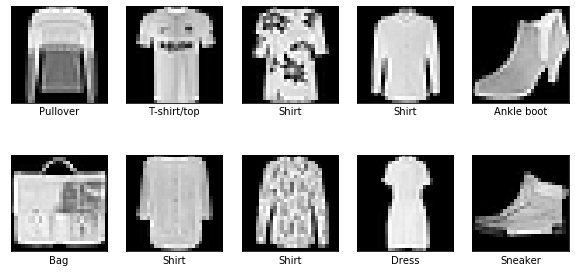

In [8]:
# Class labels: 0 to 9 in order
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show example images from train set
fig = plt.figure(figsize=(10,5))
print('Example images from train set:')
for i in range(1,11):
    ax = fig.add_subplot(2, 5, i)
    ax.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.xticks([])
    ax.axes.get_yaxis().set_visible(False)
    plt.xlabel(labels[np.argmax(y_train[i])])

# Model

W0916 18:11:36.394723 4623209920 deprecation_wrapper.py:119] From /Users/Berti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 18:11:36.469532 4623209920 deprecation_wrapper.py:119] From /Users/Berti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 18:11:36.481761 4623209920 deprecation_wrapper.py:119] From /Users/Berti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 18:11:36.511827 4623209920 deprecation_wrapper.py:119] From /Users/Berti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0916 18:11:36.547113 46232

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 256)         0         
__________

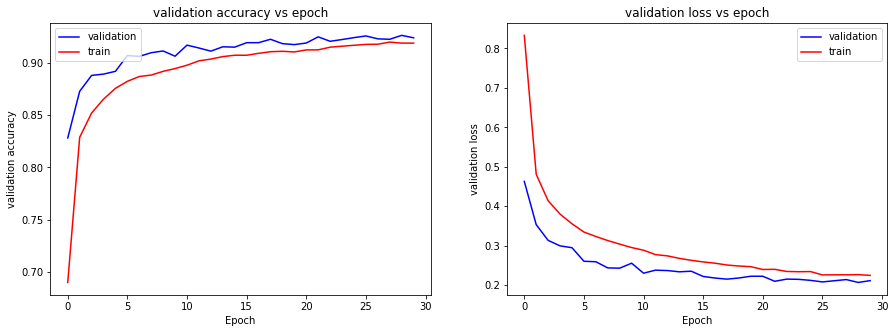

In [9]:
# Create model
model = Sequential()

# Add layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPool2D(pool_size=3))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=3))
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPool2D(pool_size=3))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary() 


# Model fitting
hist = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val,y_val), verbose=0)

# Plot learning curve
def learning_curve(trained_model):
    # Plot validation accuracy vs epochs
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(trained_model.history['val_acc'], c='b')
    ax1.plot(trained_model.history['acc'], c='r')
    ax1.legend(['validation','train'], loc='upper left')
    plt.title('validation accuracy vs epoch')
    plt.ylabel('validation accuracy')
    plt.xlabel('Epoch')

    # Plot validation loss vs epochs
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(trained_model.history['val_loss'], c='b')
    ax2.plot(trained_model.history['loss'], c='r')
    ax2.legend(['validation','train'], loc='upper right')
    plt.title('validation loss vs epoch')
    plt.ylabel('validation loss')
    plt.xlabel('Epoch')
    plt.show()
learning_curve(hist)

# Evaluation

In [10]:
# Evaluate the model
eval = model.evaluate(x_test, y_test_onehot)
print('Test loss: {:.5f} \nTest accuracy: {:.2f}%'.format(eval[0], eval[1]*100))

# Classification report for test set
y_preds = model.predict_classes(x_test)
print(classification_report(y_test,y_preds))


10000/10000 [==============================] - 7s 704us/step
Test loss: 0.20224 
Test accuracy: 92.69%
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.87      0.89      1000
           3       0.95      0.92      0.93      1000
           4       0.86      0.92      0.89      1000
           5       1.00      0.98      0.99      1000
           6       0.82      0.76      0.78      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



After model is trained, it reaches 92.69% accuracy with 93% f1-score.

The model does not work well on class 6 (shirt) which has low precision and recall. Also, for class 0 (T-shirt/top), class 2 (Pullover) and class 4 (Coat), model could work better but there are some similarities among items therefore, the f1-scores are not high.

However, other items are predicted quite well.
